**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS
import plotly.graph_objs as go
import plotly as py

**Import the dataset**

In [2]:
!wget https://github.com/rileypredum/mall_customer_segmentation/raw/master/Mall_Customers.csv

--2020-10-07 05:19:25--  https://github.com/rileypredum/mall_customer_segmentation/raw/master/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rileypredum/mall_customer_segmentation/master/Mall_Customers.csv [following]
--2020-10-07 05:19:25--  https://raw.githubusercontent.com/rileypredum/mall_customer_segmentation/master/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2020-10-07 05:19:25 (63.5 MB/s) - ‘Mall_Customers.csv’ sav

In [3]:
data = pd.read_csv('Mall_Customers.csv')

The data is just a mere sample of a larger amount of customers data. However, the purpose of this document is the familirisation of K-Means and unsupervised learning

Let us have a glimpe of the data before we dive in more depth.

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
X = data.iloc[:, [3, 4]].values

**Visualizing data**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Customers')

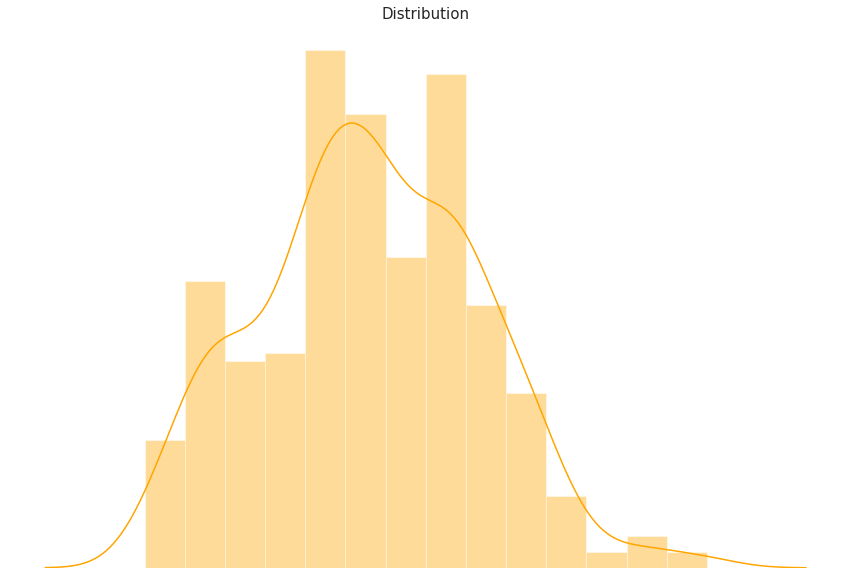

In [10]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
plt.title('Distribution',fontsize=15)
plt.axis('off')
sns.distplot(X,color='orange')
plt.xlabel('Distribution')
plt.ylabel('Customers')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



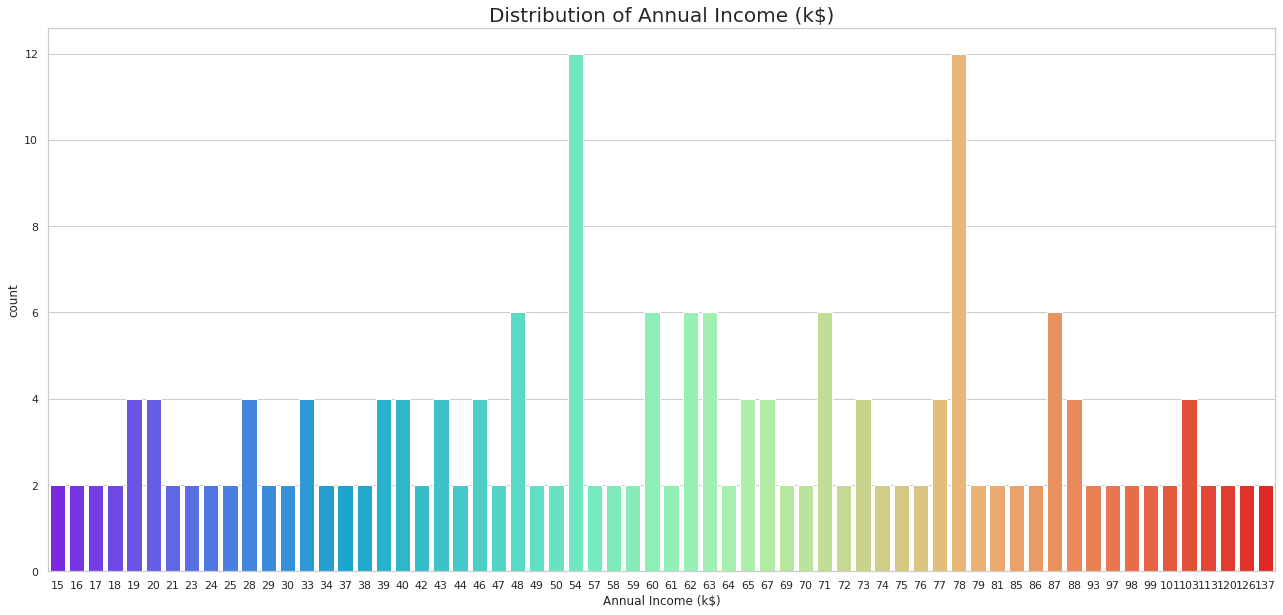

In [11]:
plt.figure(figsize=(22,10))
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, '#Customers')

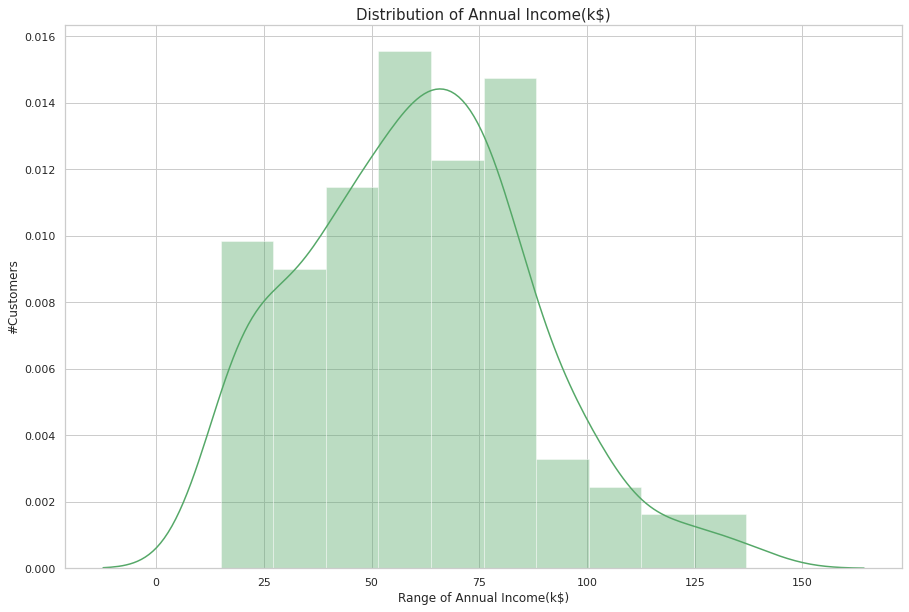

In [12]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'],color='g')
plt.title('Distribution of Annual Income(k$)', fontsize = 15)
plt.xlabel('Range of Annual Income(k$)')
plt.ylabel('#Customers')

From a business perspective, most the companies that appear to have a successful story are extremely focuced on a particular target group so as to provide the best experience for them. Hence, businesses are primarly focused on such relevant activities. In addition, occasionally, a business may select more than one segment as the focus of its activities, in which case, it would normally identify a primary target and a secondary target. Primary target markets are those market segments to which marketing efforts are primarily directed and where more of the business's resources are allocated, while secondary markets are often smaller segments or less vital to a product's success.

The Age variable would be a good indicator of the targeted Age groups.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



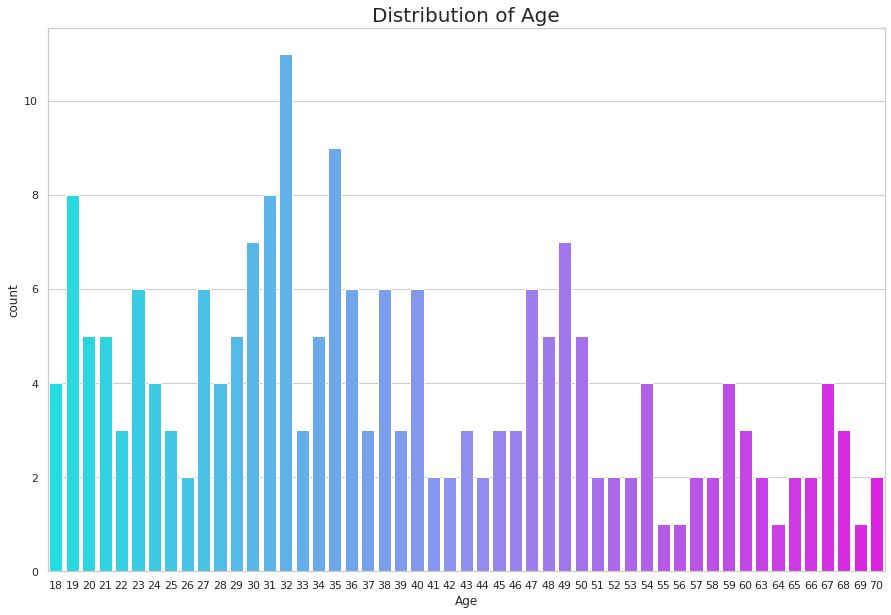

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(data['Age'], palette = 'cool')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, '#Customers')

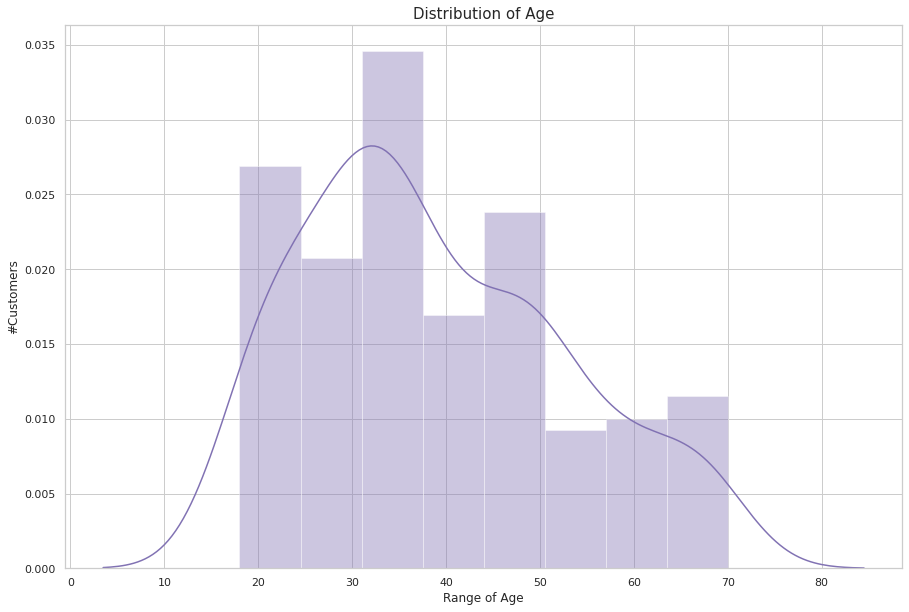

In [14]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'],color='m')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('#Customers')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



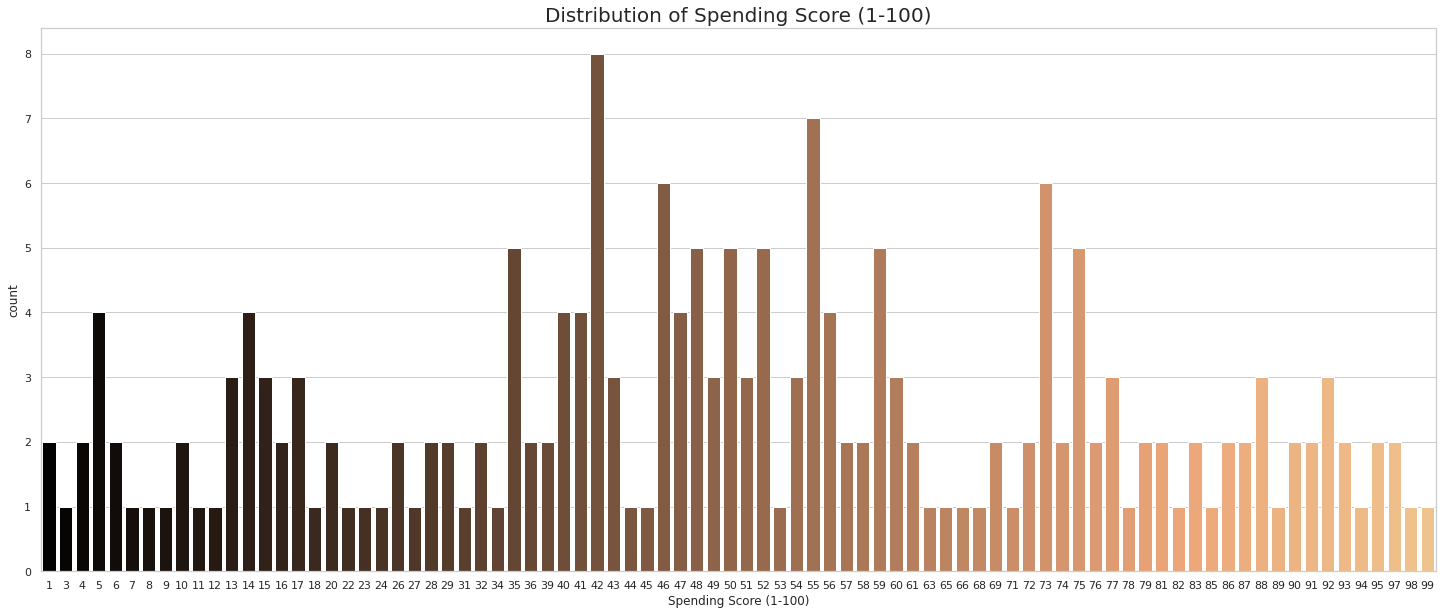

In [15]:
plt.figure(figsize=(25,10))
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, '#Customers')

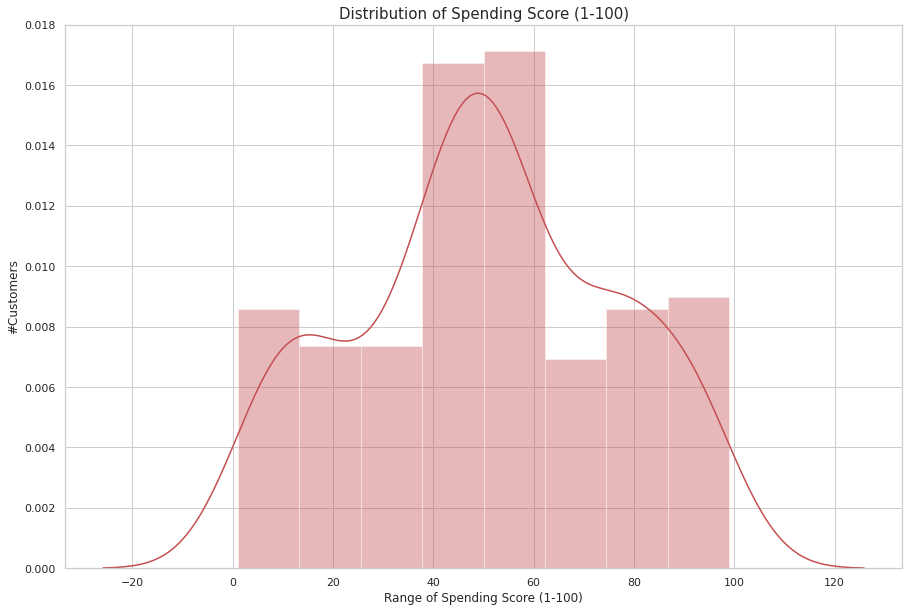

In [16]:
plt.figure(figsize=(15,10))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'],color='r')
plt.title('Distribution of Spending Score (1-100)', fontsize = 15)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('#Customers')

Individual customers, where the majority pertains to women.

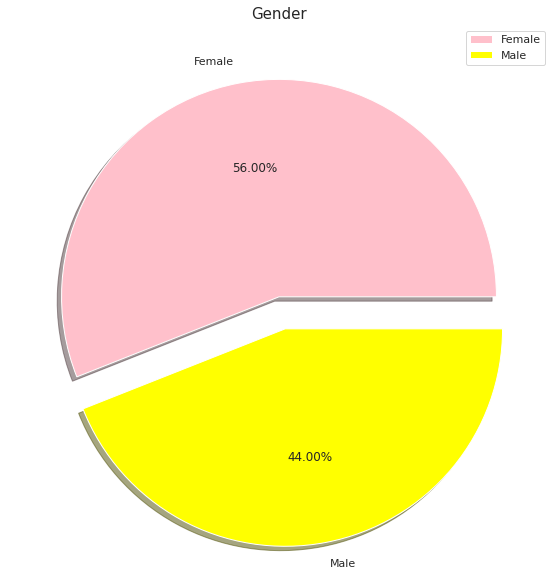

In [17]:
plt.figure(figsize=(10,10))
size = data['Gender'].value_counts()
colors = ['pink', 'yellow']
plt.pie(size, colors = colors, explode = [0, 0.15], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

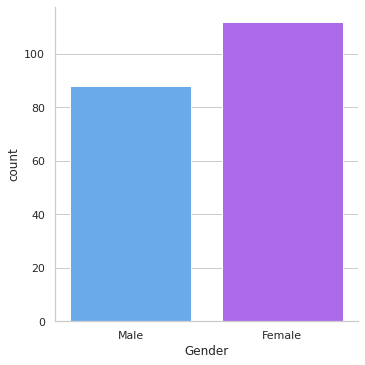

In [18]:
sns.catplot(x="Gender", kind="count", palette="cool",data=data)

Heatmap

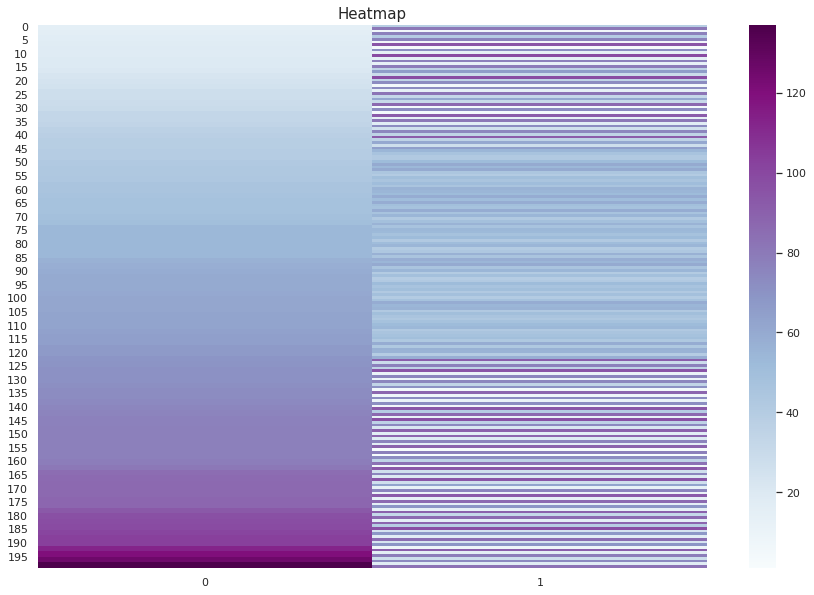

In [19]:
plt.figure(figsize=(15,10))
plt.title('Heatmap',fontsize=15)
sns.heatmap(X,cmap='BuPu')

Heatmap for the data

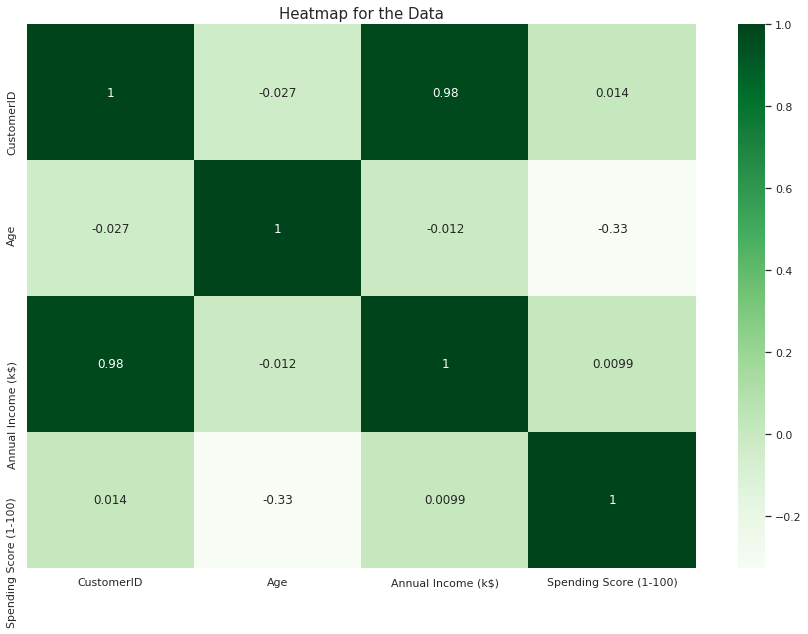

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap = 'Greens', annot = True)
plt.title('Heatmap for the Data', fontsize = 15)
plt.show()

Pairplot

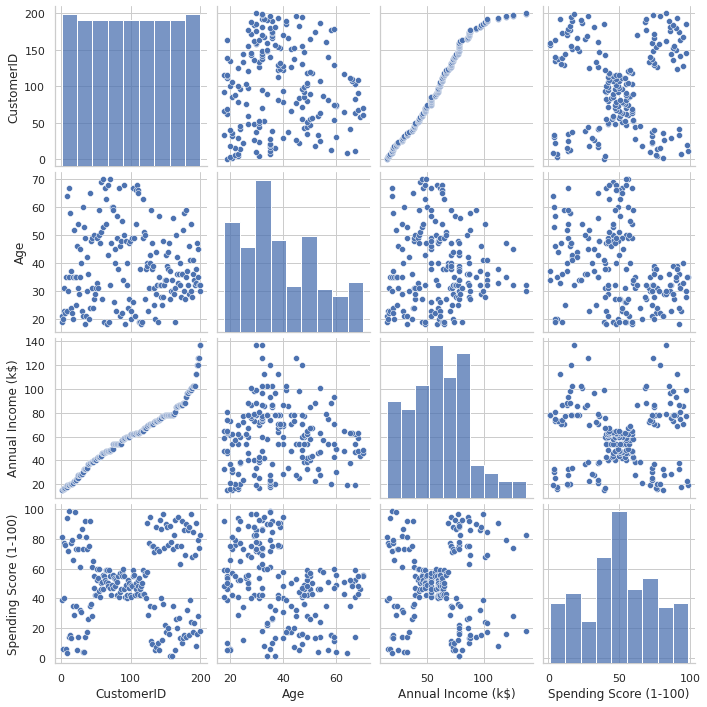

In [21]:
sns.pairplot(data)

**K-Means Clustering**

We will use the elbow method to check the optimal number of clusters

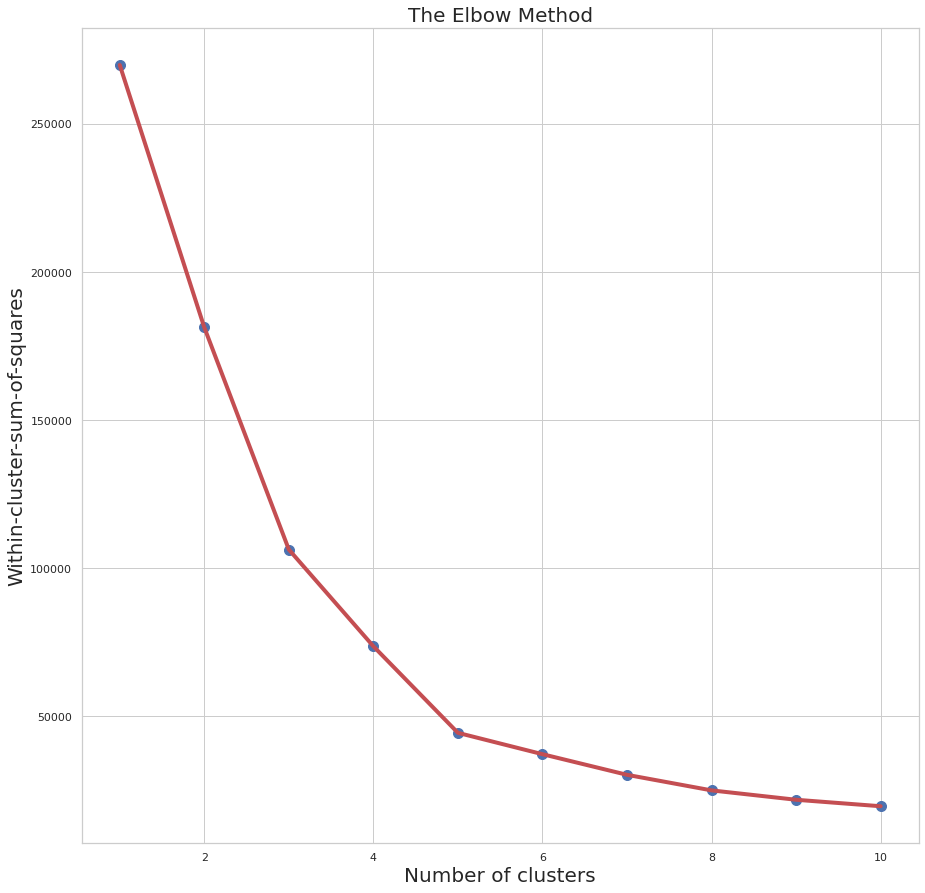

In [22]:
#Use of the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,15))
plt.scatter(range(1, 11),wcss,c='b',s=100)
plt.plot(range(1, 11),wcss,c='r',linewidth=4)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Within-cluster-sum-of-squares',fontsize=20)
plt.show()

As you can see the optimal number of clusters is five!

Here comes the training part

In [23]:
# Train the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

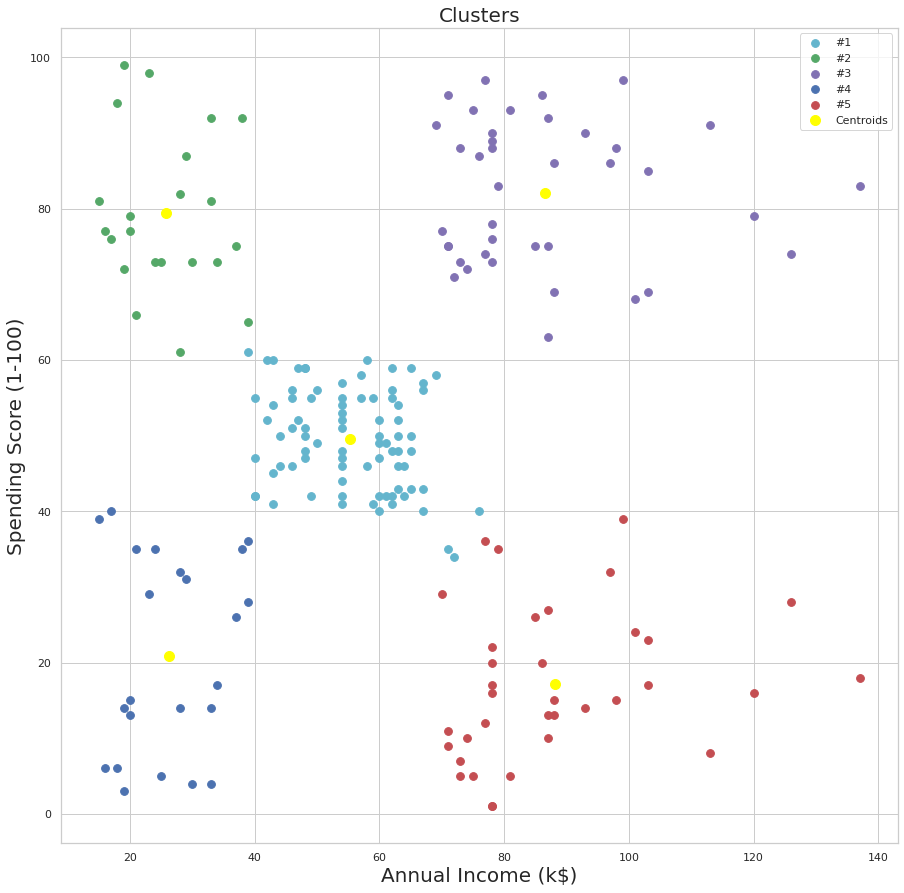

In [24]:
# Visualization of the clusters of customers
plt.figure(figsize=(15,15))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'c', label = '#1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'g', label = '#2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'm', label = '#3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'b', label = '#4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'r', label = '#5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

The customers in first cluster(cyan) have average annual income as well as average spending score.In case of the second cluster(green),customers with lower annual income but higher spending score belong to it.People with both higher annual income and higher spending score belong to third cluster(magenta).The customers in fourth cluster(blue) have lower annual income and lower spending score.People in fifth cluster(red) have lower spending score but have a high annual income!

**Hierarchical Clustering**

Let us visualize the dendrogram :

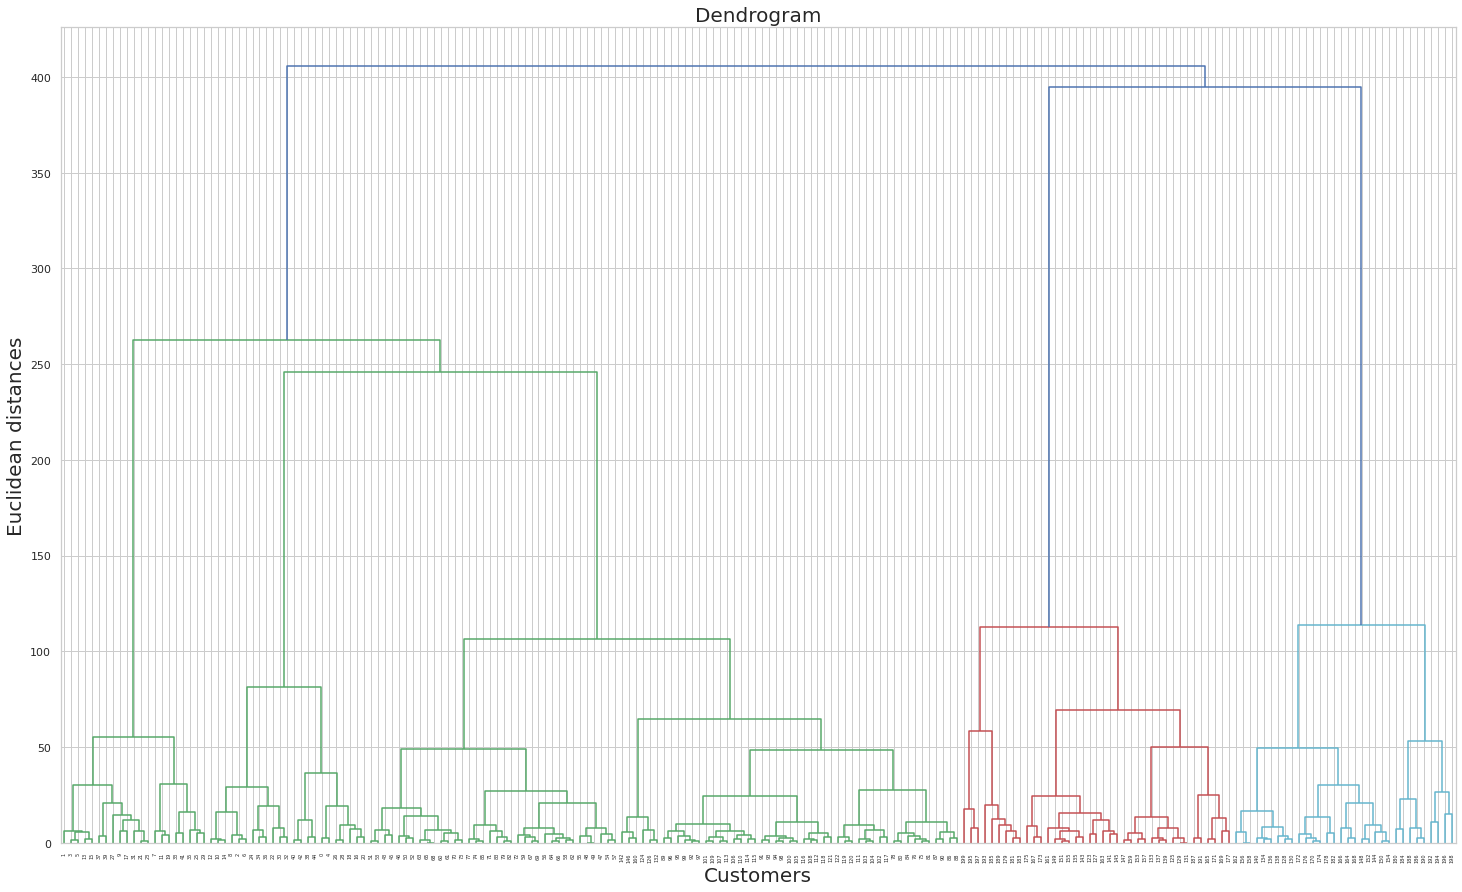

In [25]:
# Use the dendrogram to find the optimal number of clusters
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distances',fontsize=20)
plt.show()

**Birch**

No handles with labels found to put in legend.


Text(0.5, 1.0, 'BIRCH')

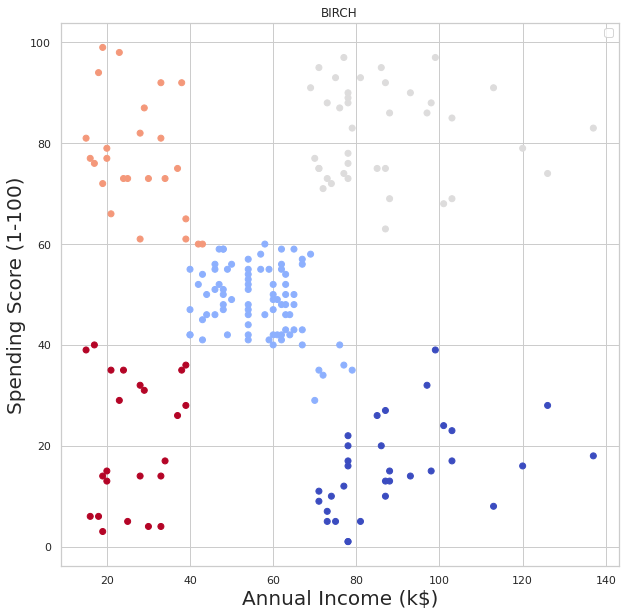

In [26]:
brc = Birch(n_clusters=5)
brc.fit(X)
brc_y_pred = brc.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=brc_y_pred, cmap='coolwarm')
plt.title("BIRCH")

**Gaussian Mixture Model**

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Gaussian Mixture Model')

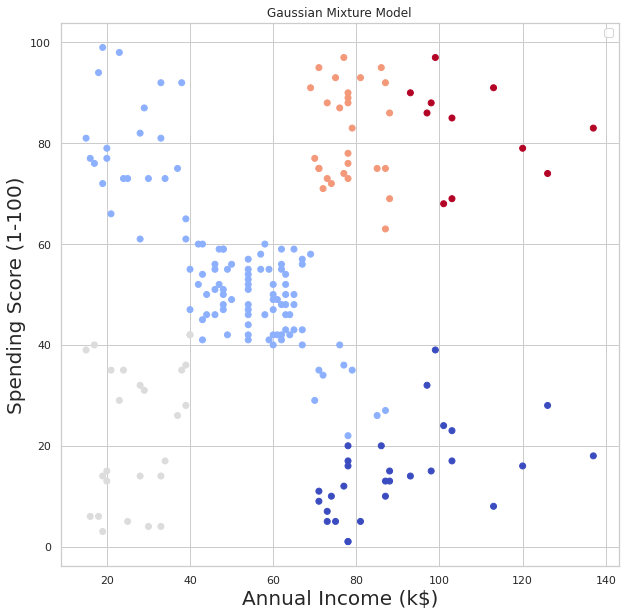

In [27]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X)
gmm_y_pred = gmm.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=gmm_y_pred, cmap='coolwarm')
plt.title("Gaussian Mixture Model")

In [28]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


**Affinity Propagation**

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Affinity Propagation Model')

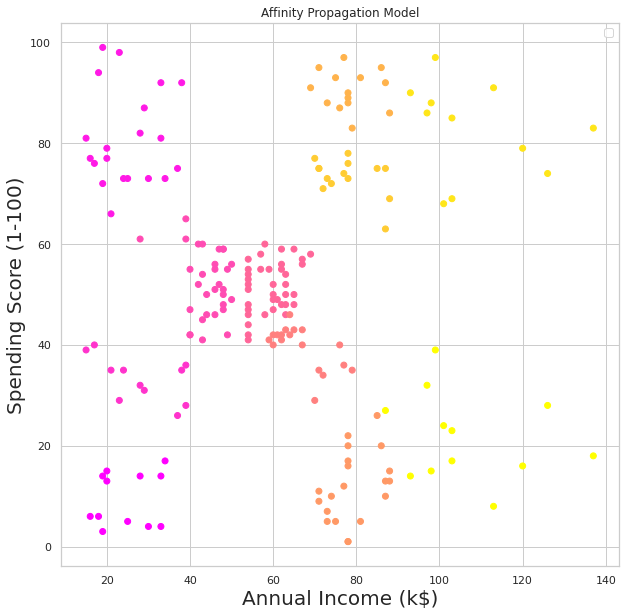

In [29]:
ap=AffinityPropagation(random_state=0)
ap.fit(X)
ap_y_pred = ap.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=ap_y_pred, cmap='spring')
plt.title("Affinity Propagation Model")

**Mean Shift**

No handles with labels found to put in legend.


Text(0.5, 1.0, 'MeanShift Model')

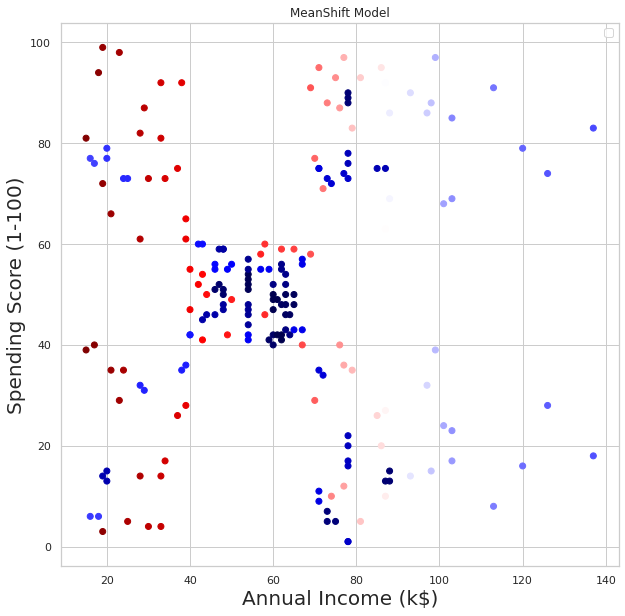

In [30]:
ms = MeanShift(bandwidth=2)
ms.fit(X)
ms_y_pred = ms.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=ms_y_pred, cmap='seismic')
plt.title("MeanShift Model")

**DBSCAN**

In [31]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.figure(figsize=(10,10))
    plt.title('Clusters',fontsize=20)
    plt.xlabel('Annual Income (k$)',fontsize=20)
    plt.ylabel('Spending Score (1-100)',fontsize=20)
    plt.legend()
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='coolwarm')
    plt.title("DBSCAN")

No handles with labels found to put in legend.


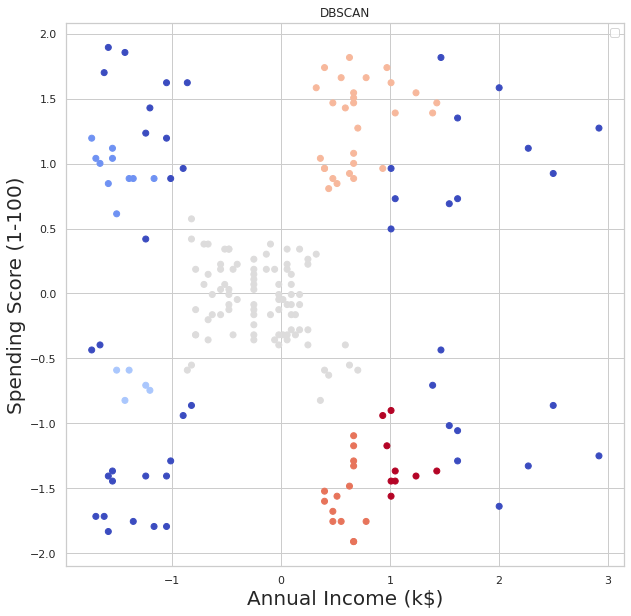

In [32]:
dbscan(X,eps=0.275,min_samples=5)

**OPTICS**

No handles with labels found to put in legend.


Text(0.5, 1.0, 'OPTICS Model')

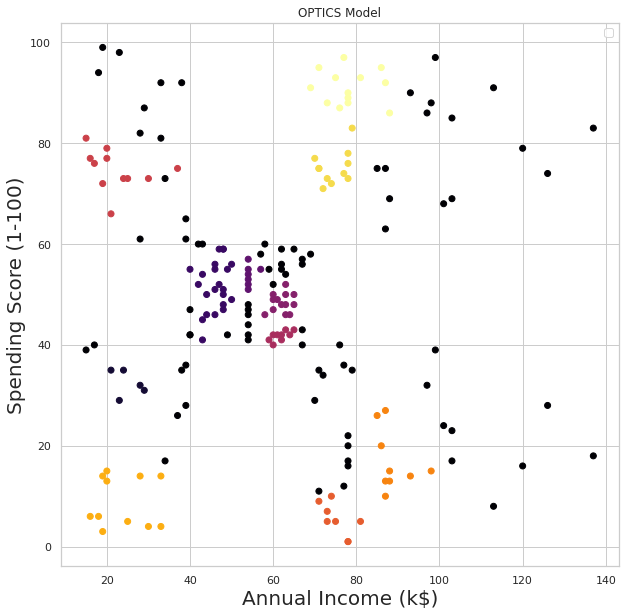

In [33]:
opt = OPTICS(min_samples=5)
opt_y_pred = opt.fit_predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=opt_y_pred, cmap='inferno')
plt.title("OPTICS Model")

Training time!

In [34]:
# Train the Hierarchical Clustering model on the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Visualization!

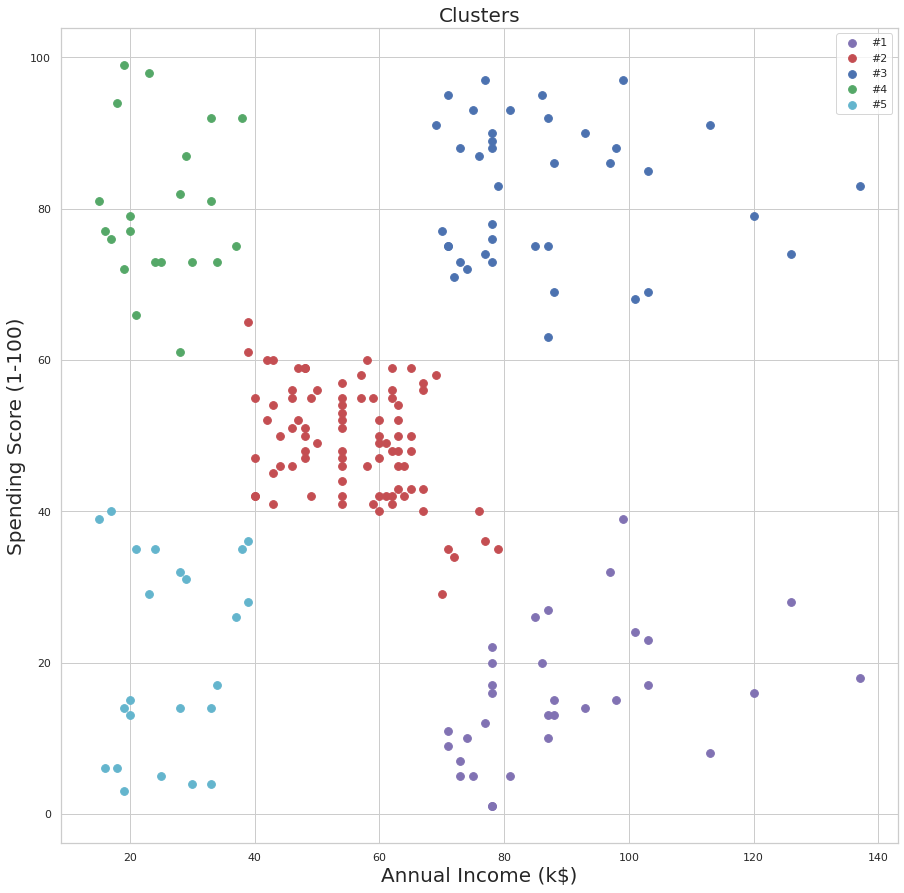

In [35]:
# Visualization of the clusters of customers
plt.figure(figsize=(15,15))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 60, c = 'm', label = '#1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 60, c = 'r', label = '#2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 60, c = 'b', label = '#3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 60, c = 'g', label = '#4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 60, c = 'c', label = '#5')
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

Segmentation using Age , Annual Income and Spending Score

In [36]:
X3 =data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:974: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



In [37]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [38]:
data['label3'] =  labels3
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['label3'], 
        size= 20,
        line=dict(
            color= data['label3'],
            width= 18
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)